# Лабораторная работа №2
## Интеллектуальный анализ данных
### Глёза Егор Дмитриевич
#### Вариант 1: Классификация изображений рукописных цифр

##### 1. Понимание  проблемы  и  данных

 MNIST (сокращение от «Modified National Institute of Standards and Technology») — датасет образцов рукописного написания цифр. Данные состоят из заранее подготовленных примеров изображений, на основе которых проводится обучение и тестирование систем. Образцы из набора MNIST нормализированы, прошли сглаживание и приведены к серому полутоновому изображению размером 28x28 пикселей.

##### 2. Предварительная  обработка  данных.

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(np.uint8)
X = X / 255.0

##### 3. Разделение данных на обучающую и тестовую выборку

In [ ]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

##### 4. Выбор  и  обучение  классификаторов

In [16]:
from sklearn.linear_model import LogisticRegression


# Логистическая регрессия
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
from sklearn.ensemble import RandomForestClassifier


# Случайный лес
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
from sklearn.neighbors import KNeighborsClassifier


# k-NN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

##### 5. Сравнение  производительности  моделе

In [19]:
import pandas as pd


models = [log_clf, rf_clf, knn_clf]
accurancies = pd.Series(index=[m.__class__.__name__ for m in models])
for model in models:
    accurancies[model.__class__.__name__] = model.score(X_test, y_test)
accurancies

LogisticRegression        0.9262
RandomForestClassifier    0.9702
KNeighborsClassifier      0.9688
dtype: float64

##### 6. Подбор  гиперпараметров.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train[:10000], y_train[:10000])

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
best_rf.score(X_test, y_test)

0.9707

In [33]:
best_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### 7. Визуализация результатов

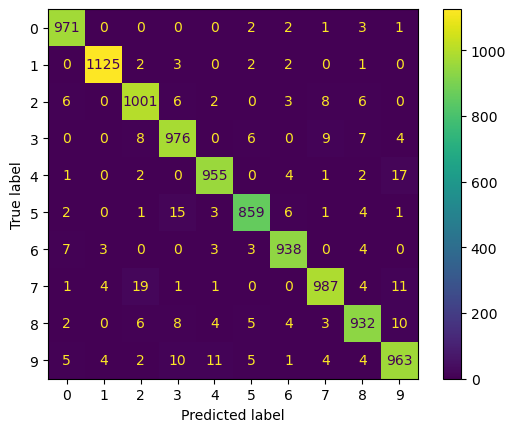

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = best_rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

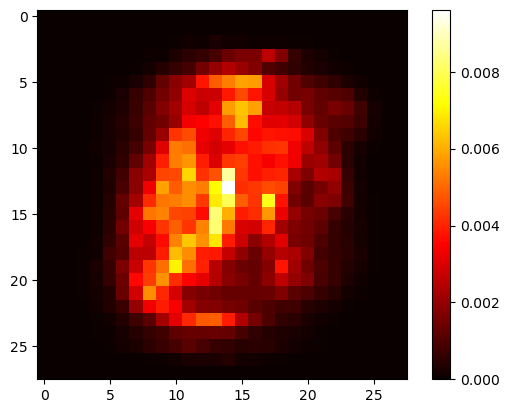

In [23]:
importances = best_rf.feature_importances_.reshape(28, 28)
plt.imshow(importances, cmap='hot')
plt.colorbar()
plt.show()

##### 8. Интерпретация  результатов.

**Лучшая модель**: RandomForest (97% точности).

**Частые ошибки**: Цифры 4 и 8, 7 и 2.

**Важные признаки**: Центральные пиксели

##### 9. Оптимизация

In [39]:
X_narrowed = X.reshape((-1,28,28))[:,5:24,5:23].reshape((70000, -1))
X_train, X_test = X_narrowed[:60000], X_narrowed[60000:]
X_narrowed.shape

(70000, 342)

In [35]:
rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.9691

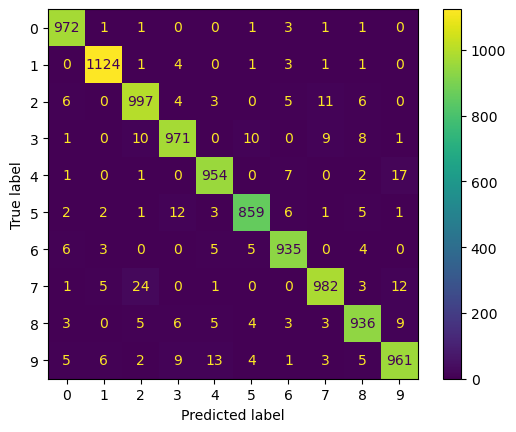

In [37]:
y_pred = rf_clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

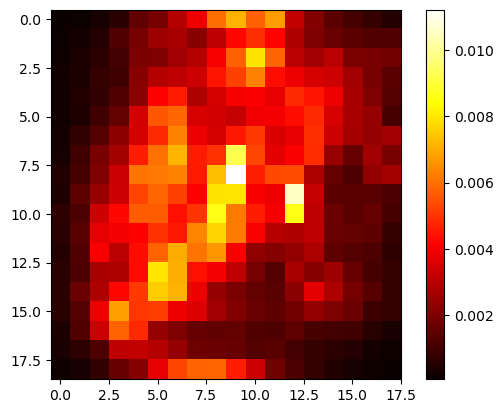

In [42]:
importances = rf_clf.feature_importances_.reshape(19, 18)
plt.imshow(importances, cmap='hot')
plt.colorbar()
plt.show()